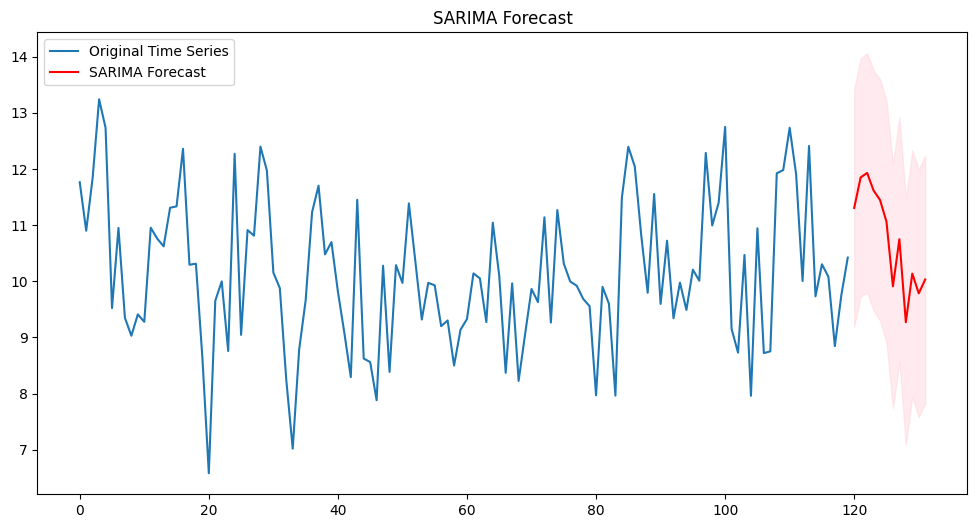

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -166.410
Date:                            Tue, 08 Oct 2024   AIC                            342.821
Time:                                    22:54:41   BIC                            356.185
Sample:                                         0   HQIC                           348.238
                                            - 120                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0824      0.107     -0.770      0.441      -0.292       0.127
ma.L1         -0.8979      0.058   

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

def fit_sarima_model(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), forecast_steps=12):
    """
    Fit a SARIMA model to a time series and make predictions.

    Parameters:
    - time_series: The time series data as a pandas Series.
    - order: The (p, d, q) order of the ARIMA model.
    - seasonal_order: The (P, D, Q, s) order of the seasonal component.
    - forecast_steps: Number of steps ahead to forecast.

    Returns:
    - fitted_model: The fitted SARIMA model.
    - forecast: Forecasted values for the specified number of steps.
    - confidence_intervals: 95% confidence intervals for the forecast.
    """
    # Fit the SARIMA model
    model = SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
    fitted_model = model.fit(disp=False)

    # Make forecast
    forecast = fitted_model.forecast(steps=forecast_steps)
    conf_int = fitted_model.get_forecast(steps=forecast_steps).conf_int()

    return fitted_model, forecast, conf_int

def plot_sarima_forecast(time_series, forecast, conf_int):
    """
    Plot the original time series and the forecast with confidence intervals.

    Parameters:
    - time_series: The original time series as a pandas Series.
    - forecast: The forecasted values.
    - conf_int: 95% confidence intervals for the forecast.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Original Time Series')
    plt.plot(forecast, label='SARIMA Forecast', color='red')

    # Plot confidence intervals
    plt.fill_between(forecast.index, 
                     conf_int.iloc[:, 0], 
                     conf_int.iloc[:, 1], 
                     color='pink', alpha=0.3)

    plt.title('SARIMA Forecast')
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Load your time series data into a pandas Series
    # Example: Simulated time series with a seasonal pattern
    np.random.seed(0)
    time = np.arange(120)
    seasonal_pattern = 10 + np.sin(2 * np.pi * time / 12)  # Simulated yearly seasonality
    noise = np.random.normal(0, 1, 120)
    time_series_data = pd.Series(seasonal_pattern + noise)

    # Fit SARIMA model
    fitted_model, forecast, conf_int = fit_sarima_model(time_series_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), forecast_steps=12)

    # Plot the forecast
    plot_sarima_forecast(time_series_data, forecast, conf_int)

    # Print model summary
    print(fitted_model.summary())
